In [1]:
pip install -q tensorflow==2.2.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.1


In [1]:
import os
import cv2
import numpy as np
import glob
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, EfficientNetB4
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import MeanIoU
import random
import seaborn as sns

In [15]:
#Quick understanding of the dataset
#temp_img = cv2.imread("images/im_16.tif")
#3 channels / spectral bands
#plt.imshow(temp_img[:,:,2]) #View each channel...
temp_mask = cv2.imread("C:\\Users\\dell\\OneDrive\\Desktop\\Final Project 2023\\Sea-Land Segmentation\\Project\\Info Data\\Abu Qir\\masks\\im_1.png") #3 channels but all same. 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)
print(temp_mask.shape)
temp_mask[36]  = [255,0,0]
temp_mask[84]  = [0,255,0]
Image.fromarray(temp_mask).show()
#print(temp_img.shape)
# labels = ['Sea', 'Land']
# sns.set_style("dark")
# fig, ax = plt.subplots(figsize = (10,8))
# ax.bar(labels, count, color = "#36454F")
# ax.set_yscale("log")
# ax.set_title("The distribution of the training set with 512x512 images",
#             fontsize = 17)
# ax.set_ylabel("Number of pixels")
# plt.savefig("Barplt.png")
# plt.show()

Labels are:  [36 84]  and the counts are:  [402431 267265]
(768, 872, 3)


In [3]:
root_directory = ''

patch_size = 256

In [4]:




#Now, crop each large image into patches of 256x256. Save them into a directory 
#so we can use data augmentation and read directly from the drive. 


#Read images from repsective 'images' subdirectory
#As all images are of different size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3. 
img_dir=root_directory+"images/"
for path, subdirs, files in os.walk(img_dir):
   # print(path)  
    dirname = path.split(os.path.sep)[-1]
    #print(dirname)
    images = os.listdir(path)  #List of all image names in this subdirectory
    #print(images)
    for i, image_name in enumerate(images):  
        if image_name.endswith (".tif"):
            #print(image_name)
            image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
            SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
            SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
            image = Image.fromarray(image)
            image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
            #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
            image = np.array(image)             
   
            #Extract patches from each image
            #print("Now patchifying image:", path+"/"+image_name)
            patches_img = patchify(image, (256, 256, 3), step=64)  #Step=256 for 256 patches means no overlap
    
            for i in range(patches_img.shape[0]):
                for j in range(patches_img.shape[1]):
                    
                    single_patch_img = patches_img[i,j,:,:]
                    #single_patch_img = (single_patch_img.astype('float32')) / 255. #We will preprocess using one of the backbones
                    single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.  
                   # print(single_patch_img)
                    cv2.imwrite(root_directory+"256_patches/images/"+
                               image_name+"patch_"+str(i)+str(j)+".tif",single_patch_img)
                    print('Successfully saved')

                    print(root_directory+"256_patches/images/"+
                           image_name+"patch_"+str(i)+str(j)+".tif")
                    #image_dataset.append(single_patch_img)
            
  

Successfully saved
256_patches/images/im_1.tifpatch_00.tif
Successfully saved
256_patches/images/im_1.tifpatch_01.tif
Successfully saved
256_patches/images/im_1.tifpatch_02.tif
Successfully saved
256_patches/images/im_1.tifpatch_03.tif
Successfully saved
256_patches/images/im_1.tifpatch_04.tif
Successfully saved
256_patches/images/im_1.tifpatch_05.tif
Successfully saved
256_patches/images/im_1.tifpatch_06.tif
Successfully saved
256_patches/images/im_1.tifpatch_07.tif
Successfully saved
256_patches/images/im_1.tifpatch_08.tif
Successfully saved
256_patches/images/im_1.tifpatch_10.tif
Successfully saved
256_patches/images/im_1.tifpatch_11.tif
Successfully saved
256_patches/images/im_1.tifpatch_12.tif
Successfully saved
256_patches/images/im_1.tifpatch_13.tif
Successfully saved
256_patches/images/im_1.tifpatch_14.tif
Successfully saved
256_patches/images/im_1.tifpatch_15.tif
Successfully saved
256_patches/images/im_1.tifpatch_16.tif
Successfully saved
256_patches/images/im_1.tifpatch_17.t

Successfully saved
256_patches/images/im_100.tifpatch_23.tif
Successfully saved
256_patches/images/im_100.tifpatch_24.tif
Successfully saved
256_patches/images/im_100.tifpatch_30.tif
Successfully saved
256_patches/images/im_100.tifpatch_31.tif
Successfully saved
256_patches/images/im_100.tifpatch_32.tif
Successfully saved
256_patches/images/im_100.tifpatch_33.tif
Successfully saved
256_patches/images/im_100.tifpatch_34.tif
Successfully saved
256_patches/images/im_100.tifpatch_40.tif
Successfully saved
256_patches/images/im_100.tifpatch_41.tif
Successfully saved
256_patches/images/im_100.tifpatch_42.tif
Successfully saved
256_patches/images/im_100.tifpatch_43.tif
Successfully saved
256_patches/images/im_100.tifpatch_44.tif
Successfully saved
256_patches/images/im_100.tifpatch_50.tif
Successfully saved
256_patches/images/im_100.tifpatch_51.tif
Successfully saved
256_patches/images/im_100.tifpatch_52.tif
Successfully saved
256_patches/images/im_100.tifpatch_53.tif
Successfully saved
256_p

Successfully saved
256_patches/images/im_12.tifpatch_27.tif
Successfully saved
256_patches/images/im_12.tifpatch_28.tif
Successfully saved
256_patches/images/im_12.tifpatch_30.tif
Successfully saved
256_patches/images/im_12.tifpatch_31.tif
Successfully saved
256_patches/images/im_12.tifpatch_32.tif
Successfully saved
256_patches/images/im_12.tifpatch_33.tif
Successfully saved
256_patches/images/im_12.tifpatch_34.tif
Successfully saved
256_patches/images/im_12.tifpatch_35.tif
Successfully saved
256_patches/images/im_12.tifpatch_36.tif
Successfully saved
256_patches/images/im_12.tifpatch_37.tif
Successfully saved
256_patches/images/im_12.tifpatch_38.tif
Successfully saved
256_patches/images/im_12.tifpatch_40.tif
Successfully saved
256_patches/images/im_12.tifpatch_41.tif
Successfully saved
256_patches/images/im_12.tifpatch_42.tif
Successfully saved
256_patches/images/im_12.tifpatch_43.tif
Successfully saved
256_patches/images/im_12.tifpatch_44.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_14.tifpatch_44.tif
Successfully saved
256_patches/images/im_14.tifpatch_50.tif
Successfully saved
256_patches/images/im_14.tifpatch_51.tif
Successfully saved
256_patches/images/im_14.tifpatch_52.tif
Successfully saved
256_patches/images/im_14.tifpatch_53.tif
Successfully saved
256_patches/images/im_14.tifpatch_54.tif
Successfully saved
256_patches/images/im_14.tifpatch_60.tif
Successfully saved
256_patches/images/im_14.tifpatch_61.tif
Successfully saved
256_patches/images/im_14.tifpatch_62.tif
Successfully saved
256_patches/images/im_14.tifpatch_63.tif
Successfully saved
256_patches/images/im_14.tifpatch_64.tif
Successfully saved
256_patches/images/im_14.tifpatch_70.tif
Successfully saved
256_patches/images/im_14.tifpatch_71.tif
Successfully saved
256_patches/images/im_14.tifpatch_72.tif
Successfully saved
256_patches/images/im_14.tifpatch_73.tif
Successfully saved
256_patches/images/im_14.tifpatch_74.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_17.tifpatch_01.tif
Successfully saved
256_patches/images/im_17.tifpatch_02.tif
Successfully saved
256_patches/images/im_17.tifpatch_03.tif
Successfully saved
256_patches/images/im_17.tifpatch_04.tif
Successfully saved
256_patches/images/im_17.tifpatch_10.tif
Successfully saved
256_patches/images/im_17.tifpatch_11.tif
Successfully saved
256_patches/images/im_17.tifpatch_12.tif
Successfully saved
256_patches/images/im_17.tifpatch_13.tif
Successfully saved
256_patches/images/im_17.tifpatch_14.tif
Successfully saved
256_patches/images/im_17.tifpatch_20.tif
Successfully saved
256_patches/images/im_17.tifpatch_21.tif
Successfully saved
256_patches/images/im_17.tifpatch_22.tif
Successfully saved
256_patches/images/im_17.tifpatch_23.tif
Successfully saved
256_patches/images/im_17.tifpatch_24.tif
Successfully saved
256_patches/images/im_17.tifpatch_30.tif
Successfully saved
256_patches/images/im_17.tifpatch_31.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_19.tifpatch_45.tif
Successfully saved
256_patches/images/im_19.tifpatch_46.tif
Successfully saved
256_patches/images/im_19.tifpatch_47.tif
Successfully saved
256_patches/images/im_19.tifpatch_48.tif
Successfully saved
256_patches/images/im_19.tifpatch_50.tif
Successfully saved
256_patches/images/im_19.tifpatch_51.tif
Successfully saved
256_patches/images/im_19.tifpatch_52.tif
Successfully saved
256_patches/images/im_19.tifpatch_53.tif
Successfully saved
256_patches/images/im_19.tifpatch_54.tif
Successfully saved
256_patches/images/im_19.tifpatch_55.tif
Successfully saved
256_patches/images/im_19.tifpatch_56.tif
Successfully saved
256_patches/images/im_19.tifpatch_57.tif
Successfully saved
256_patches/images/im_19.tifpatch_58.tif
Successfully saved
256_patches/images/im_19.tifpatch_60.tif
Successfully saved
256_patches/images/im_19.tifpatch_61.tif
Successfully saved
256_patches/images/im_19.tifpatch_62.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_20.tifpatch_81.tif
Successfully saved
256_patches/images/im_20.tifpatch_82.tif
Successfully saved
256_patches/images/im_20.tifpatch_83.tif
Successfully saved
256_patches/images/im_20.tifpatch_84.tif
Successfully saved
256_patches/images/im_20.tifpatch_85.tif
Successfully saved
256_patches/images/im_20.tifpatch_86.tif
Successfully saved
256_patches/images/im_20.tifpatch_87.tif
Successfully saved
256_patches/images/im_20.tifpatch_88.tif
Successfully saved
256_patches/images/im_21.tifpatch_00.tif
Successfully saved
256_patches/images/im_21.tifpatch_01.tif
Successfully saved
256_patches/images/im_21.tifpatch_02.tif
Successfully saved
256_patches/images/im_21.tifpatch_03.tif
Successfully saved
256_patches/images/im_21.tifpatch_04.tif
Successfully saved
256_patches/images/im_21.tifpatch_10.tif
Successfully saved
256_patches/images/im_21.tifpatch_11.tif
Successfully saved
256_patches/images/im_21.tifpatch_12.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_23.tifpatch_51.tif
Successfully saved
256_patches/images/im_23.tifpatch_52.tif
Successfully saved
256_patches/images/im_23.tifpatch_53.tif
Successfully saved
256_patches/images/im_23.tifpatch_54.tif
Successfully saved
256_patches/images/im_23.tifpatch_60.tif
Successfully saved
256_patches/images/im_23.tifpatch_61.tif
Successfully saved
256_patches/images/im_23.tifpatch_62.tif
Successfully saved
256_patches/images/im_23.tifpatch_63.tif
Successfully saved
256_patches/images/im_23.tifpatch_64.tif
Successfully saved
256_patches/images/im_23.tifpatch_70.tif
Successfully saved
256_patches/images/im_23.tifpatch_71.tif
Successfully saved
256_patches/images/im_23.tifpatch_72.tif
Successfully saved
256_patches/images/im_23.tifpatch_73.tif
Successfully saved
256_patches/images/im_23.tifpatch_74.tif
Successfully saved
256_patches/images/im_23.tifpatch_80.tif
Successfully saved
256_patches/images/im_23.tifpatch_81.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_26.tifpatch_04.tif
Successfully saved
256_patches/images/im_26.tifpatch_05.tif
Successfully saved
256_patches/images/im_26.tifpatch_06.tif
Successfully saved
256_patches/images/im_26.tifpatch_07.tif
Successfully saved
256_patches/images/im_26.tifpatch_08.tif
Successfully saved
256_patches/images/im_26.tifpatch_10.tif
Successfully saved
256_patches/images/im_26.tifpatch_11.tif
Successfully saved
256_patches/images/im_26.tifpatch_12.tif
Successfully saved
256_patches/images/im_26.tifpatch_13.tif
Successfully saved
256_patches/images/im_26.tifpatch_14.tif
Successfully saved
256_patches/images/im_26.tifpatch_15.tif
Successfully saved
256_patches/images/im_26.tifpatch_16.tif
Successfully saved
256_patches/images/im_26.tifpatch_17.tif
Successfully saved
256_patches/images/im_26.tifpatch_18.tif
Successfully saved
256_patches/images/im_26.tifpatch_20.tif
Successfully saved
256_patches/images/im_26.tifpatch_21.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_27.tifpatch_66.tif
Successfully saved
256_patches/images/im_27.tifpatch_67.tif
Successfully saved
256_patches/images/im_27.tifpatch_68.tif
Successfully saved
256_patches/images/im_27.tifpatch_70.tif
Successfully saved
256_patches/images/im_27.tifpatch_71.tif
Successfully saved
256_patches/images/im_27.tifpatch_72.tif
Successfully saved
256_patches/images/im_27.tifpatch_73.tif
Successfully saved
256_patches/images/im_27.tifpatch_74.tif
Successfully saved
256_patches/images/im_27.tifpatch_75.tif
Successfully saved
256_patches/images/im_27.tifpatch_76.tif
Successfully saved
256_patches/images/im_27.tifpatch_77.tif
Successfully saved
256_patches/images/im_27.tifpatch_78.tif
Successfully saved
256_patches/images/im_27.tifpatch_80.tif
Successfully saved
256_patches/images/im_27.tifpatch_81.tif
Successfully saved
256_patches/images/im_27.tifpatch_82.tif
Successfully saved
256_patches/images/im_27.tifpatch_83.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_29.tifpatch_58.tif
Successfully saved
256_patches/images/im_29.tifpatch_60.tif
Successfully saved
256_patches/images/im_29.tifpatch_61.tif
Successfully saved
256_patches/images/im_29.tifpatch_62.tif
Successfully saved
256_patches/images/im_29.tifpatch_63.tif
Successfully saved
256_patches/images/im_29.tifpatch_64.tif
Successfully saved
256_patches/images/im_29.tifpatch_65.tif
Successfully saved
256_patches/images/im_29.tifpatch_66.tif
Successfully saved
256_patches/images/im_29.tifpatch_67.tif
Successfully saved
256_patches/images/im_29.tifpatch_68.tif
Successfully saved
256_patches/images/im_29.tifpatch_70.tif
Successfully saved
256_patches/images/im_29.tifpatch_71.tif
Successfully saved
256_patches/images/im_29.tifpatch_72.tif
Successfully saved
256_patches/images/im_29.tifpatch_73.tif
Successfully saved
256_patches/images/im_29.tifpatch_74.tif
Successfully saved
256_patches/images/im_29.tifpatch_75.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_30.tifpatch_86.tif
Successfully saved
256_patches/images/im_30.tifpatch_87.tif
Successfully saved
256_patches/images/im_30.tifpatch_88.tif
Successfully saved
256_patches/images/im_31.tifpatch_00.tif
Successfully saved
256_patches/images/im_31.tifpatch_01.tif
Successfully saved
256_patches/images/im_31.tifpatch_02.tif
Successfully saved
256_patches/images/im_31.tifpatch_03.tif
Successfully saved
256_patches/images/im_31.tifpatch_04.tif
Successfully saved
256_patches/images/im_31.tifpatch_05.tif
Successfully saved
256_patches/images/im_31.tifpatch_06.tif
Successfully saved
256_patches/images/im_31.tifpatch_07.tif
Successfully saved
256_patches/images/im_31.tifpatch_08.tif
Successfully saved
256_patches/images/im_31.tifpatch_10.tif
Successfully saved
256_patches/images/im_31.tifpatch_11.tif
Successfully saved
256_patches/images/im_31.tifpatch_12.tif
Successfully saved
256_patches/images/im_31.tifpatch_13.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_33.tifpatch_01.tif
Successfully saved
256_patches/images/im_33.tifpatch_02.tif
Successfully saved
256_patches/images/im_33.tifpatch_03.tif
Successfully saved
256_patches/images/im_33.tifpatch_04.tif
Successfully saved
256_patches/images/im_33.tifpatch_10.tif
Successfully saved
256_patches/images/im_33.tifpatch_11.tif
Successfully saved
256_patches/images/im_33.tifpatch_12.tif
Successfully saved
256_patches/images/im_33.tifpatch_13.tif
Successfully saved
256_patches/images/im_33.tifpatch_14.tif
Successfully saved
256_patches/images/im_33.tifpatch_20.tif
Successfully saved
256_patches/images/im_33.tifpatch_21.tif
Successfully saved
256_patches/images/im_33.tifpatch_22.tif
Successfully saved
256_patches/images/im_33.tifpatch_23.tif
Successfully saved
256_patches/images/im_33.tifpatch_24.tif
Successfully saved
256_patches/images/im_33.tifpatch_30.tif
Successfully saved
256_patches/images/im_33.tifpatch_31.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_35.tifpatch_60.tif
Successfully saved
256_patches/images/im_35.tifpatch_61.tif
Successfully saved
256_patches/images/im_35.tifpatch_62.tif
Successfully saved
256_patches/images/im_35.tifpatch_63.tif
Successfully saved
256_patches/images/im_35.tifpatch_64.tif
Successfully saved
256_patches/images/im_35.tifpatch_70.tif
Successfully saved
256_patches/images/im_35.tifpatch_71.tif
Successfully saved
256_patches/images/im_35.tifpatch_72.tif
Successfully saved
256_patches/images/im_35.tifpatch_73.tif
Successfully saved
256_patches/images/im_35.tifpatch_74.tif
Successfully saved
256_patches/images/im_35.tifpatch_80.tif
Successfully saved
256_patches/images/im_35.tifpatch_81.tif
Successfully saved
256_patches/images/im_35.tifpatch_82.tif
Successfully saved
256_patches/images/im_35.tifpatch_83.tif
Successfully saved
256_patches/images/im_35.tifpatch_84.tif
Successfully saved
256_patches/images/im_36.tifpatch_00.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_38.tifpatch_32.tif
Successfully saved
256_patches/images/im_38.tifpatch_33.tif
Successfully saved
256_patches/images/im_38.tifpatch_34.tif
Successfully saved
256_patches/images/im_38.tifpatch_40.tif
Successfully saved
256_patches/images/im_38.tifpatch_41.tif
Successfully saved
256_patches/images/im_38.tifpatch_42.tif
Successfully saved
256_patches/images/im_38.tifpatch_43.tif
Successfully saved
256_patches/images/im_38.tifpatch_44.tif
Successfully saved
256_patches/images/im_38.tifpatch_50.tif
Successfully saved
256_patches/images/im_38.tifpatch_51.tif
Successfully saved
256_patches/images/im_38.tifpatch_52.tif
Successfully saved
256_patches/images/im_38.tifpatch_53.tif
Successfully saved
256_patches/images/im_38.tifpatch_54.tif
Successfully saved
256_patches/images/im_38.tifpatch_60.tif
Successfully saved
256_patches/images/im_38.tifpatch_61.tif
Successfully saved
256_patches/images/im_38.tifpatch_62.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_40.tifpatch_08.tif
Successfully saved
256_patches/images/im_40.tifpatch_10.tif
Successfully saved
256_patches/images/im_40.tifpatch_11.tif
Successfully saved
256_patches/images/im_40.tifpatch_12.tif
Successfully saved
256_patches/images/im_40.tifpatch_13.tif
Successfully saved
256_patches/images/im_40.tifpatch_14.tif
Successfully saved
256_patches/images/im_40.tifpatch_15.tif
Successfully saved
256_patches/images/im_40.tifpatch_16.tif
Successfully saved
256_patches/images/im_40.tifpatch_17.tif
Successfully saved
256_patches/images/im_40.tifpatch_18.tif
Successfully saved
256_patches/images/im_40.tifpatch_20.tif
Successfully saved
256_patches/images/im_40.tifpatch_21.tif
Successfully saved
256_patches/images/im_40.tifpatch_22.tif
Successfully saved
256_patches/images/im_40.tifpatch_23.tif
Successfully saved
256_patches/images/im_40.tifpatch_24.tif
Successfully saved
256_patches/images/im_40.tifpatch_25.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_41.tifpatch_85.tif
Successfully saved
256_patches/images/im_41.tifpatch_86.tif
Successfully saved
256_patches/images/im_41.tifpatch_87.tif
Successfully saved
256_patches/images/im_41.tifpatch_88.tif
Successfully saved
256_patches/images/im_42.tifpatch_00.tif
Successfully saved
256_patches/images/im_42.tifpatch_01.tif
Successfully saved
256_patches/images/im_42.tifpatch_02.tif
Successfully saved
256_patches/images/im_42.tifpatch_03.tif
Successfully saved
256_patches/images/im_42.tifpatch_04.tif
Successfully saved
256_patches/images/im_42.tifpatch_05.tif
Successfully saved
256_patches/images/im_42.tifpatch_06.tif
Successfully saved
256_patches/images/im_42.tifpatch_07.tif
Successfully saved
256_patches/images/im_42.tifpatch_08.tif
Successfully saved
256_patches/images/im_42.tifpatch_10.tif
Successfully saved
256_patches/images/im_42.tifpatch_11.tif
Successfully saved
256_patches/images/im_42.tifpatch_12.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_43.tifpatch_67.tif
Successfully saved
256_patches/images/im_43.tifpatch_68.tif
Successfully saved
256_patches/images/im_43.tifpatch_70.tif
Successfully saved
256_patches/images/im_43.tifpatch_71.tif
Successfully saved
256_patches/images/im_43.tifpatch_72.tif
Successfully saved
256_patches/images/im_43.tifpatch_73.tif
Successfully saved
256_patches/images/im_43.tifpatch_74.tif
Successfully saved
256_patches/images/im_43.tifpatch_75.tif
Successfully saved
256_patches/images/im_43.tifpatch_76.tif
Successfully saved
256_patches/images/im_43.tifpatch_77.tif
Successfully saved
256_patches/images/im_43.tifpatch_78.tif
Successfully saved
256_patches/images/im_43.tifpatch_80.tif
Successfully saved
256_patches/images/im_43.tifpatch_81.tif
Successfully saved
256_patches/images/im_43.tifpatch_82.tif
Successfully saved
256_patches/images/im_43.tifpatch_83.tif
Successfully saved
256_patches/images/im_43.tifpatch_84.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_46.tifpatch_18.tif
Successfully saved
256_patches/images/im_46.tifpatch_20.tif
Successfully saved
256_patches/images/im_46.tifpatch_21.tif
Successfully saved
256_patches/images/im_46.tifpatch_22.tif
Successfully saved
256_patches/images/im_46.tifpatch_23.tif
Successfully saved
256_patches/images/im_46.tifpatch_24.tif
Successfully saved
256_patches/images/im_46.tifpatch_25.tif
Successfully saved
256_patches/images/im_46.tifpatch_26.tif
Successfully saved
256_patches/images/im_46.tifpatch_27.tif
Successfully saved
256_patches/images/im_46.tifpatch_28.tif
Successfully saved
256_patches/images/im_46.tifpatch_30.tif
Successfully saved
256_patches/images/im_46.tifpatch_31.tif
Successfully saved
256_patches/images/im_46.tifpatch_32.tif
Successfully saved
256_patches/images/im_46.tifpatch_33.tif
Successfully saved
256_patches/images/im_46.tifpatch_34.tif
Successfully saved
256_patches/images/im_46.tifpatch_35.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_48.tifpatch_81.tif
Successfully saved
256_patches/images/im_48.tifpatch_82.tif
Successfully saved
256_patches/images/im_48.tifpatch_83.tif
Successfully saved
256_patches/images/im_48.tifpatch_84.tif
Successfully saved
256_patches/images/im_49.tifpatch_00.tif
Successfully saved
256_patches/images/im_49.tifpatch_01.tif
Successfully saved
256_patches/images/im_49.tifpatch_02.tif
Successfully saved
256_patches/images/im_49.tifpatch_03.tif
Successfully saved
256_patches/images/im_49.tifpatch_04.tif
Successfully saved
256_patches/images/im_49.tifpatch_05.tif
Successfully saved
256_patches/images/im_49.tifpatch_06.tif
Successfully saved
256_patches/images/im_49.tifpatch_07.tif
Successfully saved
256_patches/images/im_49.tifpatch_08.tif
Successfully saved
256_patches/images/im_49.tifpatch_10.tif
Successfully saved
256_patches/images/im_49.tifpatch_11.tif
Successfully saved
256_patches/images/im_49.tifpatch_12.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_5.tifpatch_82.tif
Successfully saved
256_patches/images/im_5.tifpatch_83.tif
Successfully saved
256_patches/images/im_5.tifpatch_84.tif
Successfully saved
256_patches/images/im_5.tifpatch_85.tif
Successfully saved
256_patches/images/im_5.tifpatch_86.tif
Successfully saved
256_patches/images/im_5.tifpatch_87.tif
Successfully saved
256_patches/images/im_5.tifpatch_88.tif
Successfully saved
256_patches/images/im_50.tifpatch_00.tif
Successfully saved
256_patches/images/im_50.tifpatch_01.tif
Successfully saved
256_patches/images/im_50.tifpatch_02.tif
Successfully saved
256_patches/images/im_50.tifpatch_03.tif
Successfully saved
256_patches/images/im_50.tifpatch_04.tif
Successfully saved
256_patches/images/im_50.tifpatch_10.tif
Successfully saved
256_patches/images/im_50.tifpatch_11.tif
Successfully saved
256_patches/images/im_50.tifpatch_12.tif
Successfully saved
256_patches/images/im_50.tifpatch_13.tif
Successfully saved
256_patches/images/im_50.tif

Successfully saved
256_patches/images/im_52.tifpatch_53.tif
Successfully saved
256_patches/images/im_52.tifpatch_54.tif
Successfully saved
256_patches/images/im_52.tifpatch_55.tif
Successfully saved
256_patches/images/im_52.tifpatch_56.tif
Successfully saved
256_patches/images/im_52.tifpatch_57.tif
Successfully saved
256_patches/images/im_52.tifpatch_58.tif
Successfully saved
256_patches/images/im_52.tifpatch_60.tif
Successfully saved
256_patches/images/im_52.tifpatch_61.tif
Successfully saved
256_patches/images/im_52.tifpatch_62.tif
Successfully saved
256_patches/images/im_52.tifpatch_63.tif
Successfully saved
256_patches/images/im_52.tifpatch_64.tif
Successfully saved
256_patches/images/im_52.tifpatch_65.tif
Successfully saved
256_patches/images/im_52.tifpatch_66.tif
Successfully saved
256_patches/images/im_52.tifpatch_67.tif
Successfully saved
256_patches/images/im_52.tifpatch_68.tif
Successfully saved
256_patches/images/im_52.tifpatch_70.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_54.tifpatch_25.tif
Successfully saved
256_patches/images/im_54.tifpatch_26.tif
Successfully saved
256_patches/images/im_54.tifpatch_27.tif
Successfully saved
256_patches/images/im_54.tifpatch_28.tif
Successfully saved
256_patches/images/im_54.tifpatch_30.tif
Successfully saved
256_patches/images/im_54.tifpatch_31.tif
Successfully saved
256_patches/images/im_54.tifpatch_32.tif
Successfully saved
256_patches/images/im_54.tifpatch_33.tif
Successfully saved
256_patches/images/im_54.tifpatch_34.tif
Successfully saved
256_patches/images/im_54.tifpatch_35.tif
Successfully saved
256_patches/images/im_54.tifpatch_36.tif
Successfully saved
256_patches/images/im_54.tifpatch_37.tif
Successfully saved
256_patches/images/im_54.tifpatch_38.tif
Successfully saved
256_patches/images/im_54.tifpatch_40.tif
Successfully saved
256_patches/images/im_54.tifpatch_41.tif
Successfully saved
256_patches/images/im_54.tifpatch_42.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_56.tifpatch_00.tif
Successfully saved
256_patches/images/im_56.tifpatch_01.tif
Successfully saved
256_patches/images/im_56.tifpatch_02.tif
Successfully saved
256_patches/images/im_56.tifpatch_03.tif
Successfully saved
256_patches/images/im_56.tifpatch_04.tif
Successfully saved
256_patches/images/im_56.tifpatch_05.tif
Successfully saved
256_patches/images/im_56.tifpatch_06.tif
Successfully saved
256_patches/images/im_56.tifpatch_07.tif
Successfully saved
256_patches/images/im_56.tifpatch_08.tif
Successfully saved
256_patches/images/im_56.tifpatch_10.tif
Successfully saved
256_patches/images/im_56.tifpatch_11.tif
Successfully saved
256_patches/images/im_56.tifpatch_12.tif
Successfully saved
256_patches/images/im_56.tifpatch_13.tif
Successfully saved
256_patches/images/im_56.tifpatch_14.tif
Successfully saved
256_patches/images/im_56.tifpatch_15.tif
Successfully saved
256_patches/images/im_56.tifpatch_16.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_57.tifpatch_73.tif
Successfully saved
256_patches/images/im_57.tifpatch_74.tif
Successfully saved
256_patches/images/im_57.tifpatch_75.tif
Successfully saved
256_patches/images/im_57.tifpatch_76.tif
Successfully saved
256_patches/images/im_57.tifpatch_77.tif
Successfully saved
256_patches/images/im_57.tifpatch_78.tif
Successfully saved
256_patches/images/im_57.tifpatch_80.tif
Successfully saved
256_patches/images/im_57.tifpatch_81.tif
Successfully saved
256_patches/images/im_57.tifpatch_82.tif
Successfully saved
256_patches/images/im_57.tifpatch_83.tif
Successfully saved
256_patches/images/im_57.tifpatch_84.tif
Successfully saved
256_patches/images/im_57.tifpatch_85.tif
Successfully saved
256_patches/images/im_57.tifpatch_86.tif
Successfully saved
256_patches/images/im_57.tifpatch_87.tif
Successfully saved
256_patches/images/im_57.tifpatch_88.tif
Successfully saved
256_patches/images/im_58.tifpatch_00.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_59.tifpatch_70.tif
Successfully saved
256_patches/images/im_59.tifpatch_71.tif
Successfully saved
256_patches/images/im_59.tifpatch_72.tif
Successfully saved
256_patches/images/im_59.tifpatch_73.tif
Successfully saved
256_patches/images/im_59.tifpatch_74.tif
Successfully saved
256_patches/images/im_59.tifpatch_75.tif
Successfully saved
256_patches/images/im_59.tifpatch_76.tif
Successfully saved
256_patches/images/im_59.tifpatch_77.tif
Successfully saved
256_patches/images/im_59.tifpatch_78.tif
Successfully saved
256_patches/images/im_59.tifpatch_80.tif
Successfully saved
256_patches/images/im_59.tifpatch_81.tif
Successfully saved
256_patches/images/im_59.tifpatch_82.tif
Successfully saved
256_patches/images/im_59.tifpatch_83.tif
Successfully saved
256_patches/images/im_59.tifpatch_84.tif
Successfully saved
256_patches/images/im_59.tifpatch_85.tif
Successfully saved
256_patches/images/im_59.tifpatch_86.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_61.tifpatch_24.tif
Successfully saved
256_patches/images/im_61.tifpatch_30.tif
Successfully saved
256_patches/images/im_61.tifpatch_31.tif
Successfully saved
256_patches/images/im_61.tifpatch_32.tif
Successfully saved
256_patches/images/im_61.tifpatch_33.tif
Successfully saved
256_patches/images/im_61.tifpatch_34.tif
Successfully saved
256_patches/images/im_61.tifpatch_40.tif
Successfully saved
256_patches/images/im_61.tifpatch_41.tif
Successfully saved
256_patches/images/im_61.tifpatch_42.tif
Successfully saved
256_patches/images/im_61.tifpatch_43.tif
Successfully saved
256_patches/images/im_61.tifpatch_44.tif
Successfully saved
256_patches/images/im_61.tifpatch_50.tif
Successfully saved
256_patches/images/im_61.tifpatch_51.tif
Successfully saved
256_patches/images/im_61.tifpatch_52.tif
Successfully saved
256_patches/images/im_61.tifpatch_53.tif
Successfully saved
256_patches/images/im_61.tifpatch_54.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_63.tifpatch_54.tif
Successfully saved
256_patches/images/im_63.tifpatch_60.tif
Successfully saved
256_patches/images/im_63.tifpatch_61.tif
Successfully saved
256_patches/images/im_63.tifpatch_62.tif
Successfully saved
256_patches/images/im_63.tifpatch_63.tif
Successfully saved
256_patches/images/im_63.tifpatch_64.tif
Successfully saved
256_patches/images/im_63.tifpatch_70.tif
Successfully saved
256_patches/images/im_63.tifpatch_71.tif
Successfully saved
256_patches/images/im_63.tifpatch_72.tif
Successfully saved
256_patches/images/im_63.tifpatch_73.tif
Successfully saved
256_patches/images/im_63.tifpatch_74.tif
Successfully saved
256_patches/images/im_63.tifpatch_80.tif
Successfully saved
256_patches/images/im_63.tifpatch_81.tif
Successfully saved
256_patches/images/im_63.tifpatch_82.tif
Successfully saved
256_patches/images/im_63.tifpatch_83.tif
Successfully saved
256_patches/images/im_63.tifpatch_84.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_66.tifpatch_38.tif
Successfully saved
256_patches/images/im_66.tifpatch_40.tif
Successfully saved
256_patches/images/im_66.tifpatch_41.tif
Successfully saved
256_patches/images/im_66.tifpatch_42.tif
Successfully saved
256_patches/images/im_66.tifpatch_43.tif
Successfully saved
256_patches/images/im_66.tifpatch_44.tif
Successfully saved
256_patches/images/im_66.tifpatch_45.tif
Successfully saved
256_patches/images/im_66.tifpatch_46.tif
Successfully saved
256_patches/images/im_66.tifpatch_47.tif
Successfully saved
256_patches/images/im_66.tifpatch_48.tif
Successfully saved
256_patches/images/im_66.tifpatch_50.tif
Successfully saved
256_patches/images/im_66.tifpatch_51.tif
Successfully saved
256_patches/images/im_66.tifpatch_52.tif
Successfully saved
256_patches/images/im_66.tifpatch_53.tif
Successfully saved
256_patches/images/im_66.tifpatch_54.tif
Successfully saved
256_patches/images/im_66.tifpatch_55.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_68.tifpatch_35.tif
Successfully saved
256_patches/images/im_68.tifpatch_36.tif
Successfully saved
256_patches/images/im_68.tifpatch_37.tif
Successfully saved
256_patches/images/im_68.tifpatch_38.tif
Successfully saved
256_patches/images/im_68.tifpatch_40.tif
Successfully saved
256_patches/images/im_68.tifpatch_41.tif
Successfully saved
256_patches/images/im_68.tifpatch_42.tif
Successfully saved
256_patches/images/im_68.tifpatch_43.tif
Successfully saved
256_patches/images/im_68.tifpatch_44.tif
Successfully saved
256_patches/images/im_68.tifpatch_45.tif
Successfully saved
256_patches/images/im_68.tifpatch_46.tif
Successfully saved
256_patches/images/im_68.tifpatch_47.tif
Successfully saved
256_patches/images/im_68.tifpatch_48.tif
Successfully saved
256_patches/images/im_68.tifpatch_50.tif
Successfully saved
256_patches/images/im_68.tifpatch_51.tif
Successfully saved
256_patches/images/im_68.tifpatch_52.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_7.tifpatch_08.tif
Successfully saved
256_patches/images/im_7.tifpatch_10.tif
Successfully saved
256_patches/images/im_7.tifpatch_11.tif
Successfully saved
256_patches/images/im_7.tifpatch_12.tif
Successfully saved
256_patches/images/im_7.tifpatch_13.tif
Successfully saved
256_patches/images/im_7.tifpatch_14.tif
Successfully saved
256_patches/images/im_7.tifpatch_15.tif
Successfully saved
256_patches/images/im_7.tifpatch_16.tif
Successfully saved
256_patches/images/im_7.tifpatch_17.tif
Successfully saved
256_patches/images/im_7.tifpatch_18.tif
Successfully saved
256_patches/images/im_7.tifpatch_20.tif
Successfully saved
256_patches/images/im_7.tifpatch_21.tif
Successfully saved
256_patches/images/im_7.tifpatch_22.tif
Successfully saved
256_patches/images/im_7.tifpatch_23.tif
Successfully saved
256_patches/images/im_7.tifpatch_24.tif
Successfully saved
256_patches/images/im_7.tifpatch_25.tif
Successfully saved
256_patches/images/im_7.tifpatch_26.t

Successfully saved
256_patches/images/im_71.tifpatch_52.tif
Successfully saved
256_patches/images/im_71.tifpatch_53.tif
Successfully saved
256_patches/images/im_71.tifpatch_54.tif
Successfully saved
256_patches/images/im_71.tifpatch_60.tif
Successfully saved
256_patches/images/im_71.tifpatch_61.tif
Successfully saved
256_patches/images/im_71.tifpatch_62.tif
Successfully saved
256_patches/images/im_71.tifpatch_63.tif
Successfully saved
256_patches/images/im_71.tifpatch_64.tif
Successfully saved
256_patches/images/im_71.tifpatch_70.tif
Successfully saved
256_patches/images/im_71.tifpatch_71.tif
Successfully saved
256_patches/images/im_71.tifpatch_72.tif
Successfully saved
256_patches/images/im_71.tifpatch_73.tif
Successfully saved
256_patches/images/im_71.tifpatch_74.tif
Successfully saved
256_patches/images/im_71.tifpatch_80.tif
Successfully saved
256_patches/images/im_71.tifpatch_81.tif
Successfully saved
256_patches/images/im_71.tifpatch_82.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_74.tifpatch_74.tif
Successfully saved
256_patches/images/im_74.tifpatch_80.tif
Successfully saved
256_patches/images/im_74.tifpatch_81.tif
Successfully saved
256_patches/images/im_74.tifpatch_82.tif
Successfully saved
256_patches/images/im_74.tifpatch_83.tif
Successfully saved
256_patches/images/im_74.tifpatch_84.tif
Successfully saved
256_patches/images/im_75.tifpatch_00.tif
Successfully saved
256_patches/images/im_75.tifpatch_01.tif
Successfully saved
256_patches/images/im_75.tifpatch_02.tif
Successfully saved
256_patches/images/im_75.tifpatch_03.tif
Successfully saved
256_patches/images/im_75.tifpatch_04.tif
Successfully saved
256_patches/images/im_75.tifpatch_10.tif
Successfully saved
256_patches/images/im_75.tifpatch_11.tif
Successfully saved
256_patches/images/im_75.tifpatch_12.tif
Successfully saved
256_patches/images/im_75.tifpatch_13.tif
Successfully saved
256_patches/images/im_75.tifpatch_14.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_78.tifpatch_20.tif
Successfully saved
256_patches/images/im_78.tifpatch_21.tif
Successfully saved
256_patches/images/im_78.tifpatch_22.tif
Successfully saved
256_patches/images/im_78.tifpatch_23.tif
Successfully saved
256_patches/images/im_78.tifpatch_24.tif
Successfully saved
256_patches/images/im_78.tifpatch_25.tif
Successfully saved
256_patches/images/im_78.tifpatch_26.tif
Successfully saved
256_patches/images/im_78.tifpatch_27.tif
Successfully saved
256_patches/images/im_78.tifpatch_28.tif
Successfully saved
256_patches/images/im_78.tifpatch_30.tif
Successfully saved
256_patches/images/im_78.tifpatch_31.tif
Successfully saved
256_patches/images/im_78.tifpatch_32.tif
Successfully saved
256_patches/images/im_78.tifpatch_33.tif
Successfully saved
256_patches/images/im_78.tifpatch_34.tif
Successfully saved
256_patches/images/im_78.tifpatch_35.tif
Successfully saved
256_patches/images/im_78.tifpatch_36.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_8.tifpatch_34.tif
Successfully saved
256_patches/images/im_8.tifpatch_35.tif
Successfully saved
256_patches/images/im_8.tifpatch_36.tif
Successfully saved
256_patches/images/im_8.tifpatch_37.tif
Successfully saved
256_patches/images/im_8.tifpatch_38.tif
Successfully saved
256_patches/images/im_8.tifpatch_40.tif
Successfully saved
256_patches/images/im_8.tifpatch_41.tif
Successfully saved
256_patches/images/im_8.tifpatch_42.tif
Successfully saved
256_patches/images/im_8.tifpatch_43.tif
Successfully saved
256_patches/images/im_8.tifpatch_44.tif
Successfully saved
256_patches/images/im_8.tifpatch_45.tif
Successfully saved
256_patches/images/im_8.tifpatch_46.tif
Successfully saved
256_patches/images/im_8.tifpatch_47.tif
Successfully saved
256_patches/images/im_8.tifpatch_48.tif
Successfully saved
256_patches/images/im_8.tifpatch_50.tif
Successfully saved
256_patches/images/im_8.tifpatch_51.tif
Successfully saved
256_patches/images/im_8.tifpatch_52.t

Successfully saved
256_patches/images/im_82.tifpatch_01.tif
Successfully saved
256_patches/images/im_82.tifpatch_02.tif
Successfully saved
256_patches/images/im_82.tifpatch_03.tif
Successfully saved
256_patches/images/im_82.tifpatch_04.tif
Successfully saved
256_patches/images/im_82.tifpatch_05.tif
Successfully saved
256_patches/images/im_82.tifpatch_06.tif
Successfully saved
256_patches/images/im_82.tifpatch_07.tif
Successfully saved
256_patches/images/im_82.tifpatch_08.tif
Successfully saved
256_patches/images/im_82.tifpatch_10.tif
Successfully saved
256_patches/images/im_82.tifpatch_11.tif
Successfully saved
256_patches/images/im_82.tifpatch_12.tif
Successfully saved
256_patches/images/im_82.tifpatch_13.tif
Successfully saved
256_patches/images/im_82.tifpatch_14.tif
Successfully saved
256_patches/images/im_82.tifpatch_15.tif
Successfully saved
256_patches/images/im_82.tifpatch_16.tif
Successfully saved
256_patches/images/im_82.tifpatch_17.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_84.tifpatch_01.tif
Successfully saved
256_patches/images/im_84.tifpatch_02.tif
Successfully saved
256_patches/images/im_84.tifpatch_03.tif
Successfully saved
256_patches/images/im_84.tifpatch_04.tif
Successfully saved
256_patches/images/im_84.tifpatch_05.tif
Successfully saved
256_patches/images/im_84.tifpatch_06.tif
Successfully saved
256_patches/images/im_84.tifpatch_07.tif
Successfully saved
256_patches/images/im_84.tifpatch_08.tif
Successfully saved
256_patches/images/im_84.tifpatch_10.tif
Successfully saved
256_patches/images/im_84.tifpatch_11.tif
Successfully saved
256_patches/images/im_84.tifpatch_12.tif
Successfully saved
256_patches/images/im_84.tifpatch_13.tif
Successfully saved
256_patches/images/im_84.tifpatch_14.tif
Successfully saved
256_patches/images/im_84.tifpatch_15.tif
Successfully saved
256_patches/images/im_84.tifpatch_16.tif
Successfully saved
256_patches/images/im_84.tifpatch_17.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_86.tifpatch_34.tif
Successfully saved
256_patches/images/im_86.tifpatch_35.tif
Successfully saved
256_patches/images/im_86.tifpatch_36.tif
Successfully saved
256_patches/images/im_86.tifpatch_37.tif
Successfully saved
256_patches/images/im_86.tifpatch_38.tif
Successfully saved
256_patches/images/im_86.tifpatch_40.tif
Successfully saved
256_patches/images/im_86.tifpatch_41.tif
Successfully saved
256_patches/images/im_86.tifpatch_42.tif
Successfully saved
256_patches/images/im_86.tifpatch_43.tif
Successfully saved
256_patches/images/im_86.tifpatch_44.tif
Successfully saved
256_patches/images/im_86.tifpatch_45.tif
Successfully saved
256_patches/images/im_86.tifpatch_46.tif
Successfully saved
256_patches/images/im_86.tifpatch_47.tif
Successfully saved
256_patches/images/im_86.tifpatch_48.tif
Successfully saved
256_patches/images/im_86.tifpatch_50.tif
Successfully saved
256_patches/images/im_86.tifpatch_51.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_88.tifpatch_40.tif
Successfully saved
256_patches/images/im_88.tifpatch_41.tif
Successfully saved
256_patches/images/im_88.tifpatch_42.tif
Successfully saved
256_patches/images/im_88.tifpatch_43.tif
Successfully saved
256_patches/images/im_88.tifpatch_44.tif
Successfully saved
256_patches/images/im_88.tifpatch_45.tif
Successfully saved
256_patches/images/im_88.tifpatch_46.tif
Successfully saved
256_patches/images/im_88.tifpatch_47.tif
Successfully saved
256_patches/images/im_88.tifpatch_48.tif
Successfully saved
256_patches/images/im_88.tifpatch_50.tif
Successfully saved
256_patches/images/im_88.tifpatch_51.tif
Successfully saved
256_patches/images/im_88.tifpatch_52.tif
Successfully saved
256_patches/images/im_88.tifpatch_53.tif
Successfully saved
256_patches/images/im_88.tifpatch_54.tif
Successfully saved
256_patches/images/im_88.tifpatch_55.tif
Successfully saved
256_patches/images/im_88.tifpatch_56.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_9.tifpatch_80.tif
Successfully saved
256_patches/images/im_9.tifpatch_81.tif
Successfully saved
256_patches/images/im_9.tifpatch_82.tif
Successfully saved
256_patches/images/im_9.tifpatch_83.tif
Successfully saved
256_patches/images/im_9.tifpatch_84.tif
Successfully saved
256_patches/images/im_90.tifpatch_00.tif
Successfully saved
256_patches/images/im_90.tifpatch_01.tif
Successfully saved
256_patches/images/im_90.tifpatch_02.tif
Successfully saved
256_patches/images/im_90.tifpatch_03.tif
Successfully saved
256_patches/images/im_90.tifpatch_04.tif
Successfully saved
256_patches/images/im_90.tifpatch_05.tif
Successfully saved
256_patches/images/im_90.tifpatch_06.tif
Successfully saved
256_patches/images/im_90.tifpatch_07.tif
Successfully saved
256_patches/images/im_90.tifpatch_08.tif
Successfully saved
256_patches/images/im_90.tifpatch_10.tif
Successfully saved
256_patches/images/im_90.tifpatch_11.tif
Successfully saved
256_patches/images/im_90.t

Successfully saved
256_patches/images/im_92.tifpatch_62.tif
Successfully saved
256_patches/images/im_92.tifpatch_63.tif
Successfully saved
256_patches/images/im_92.tifpatch_64.tif
Successfully saved
256_patches/images/im_92.tifpatch_70.tif
Successfully saved
256_patches/images/im_92.tifpatch_71.tif
Successfully saved
256_patches/images/im_92.tifpatch_72.tif
Successfully saved
256_patches/images/im_92.tifpatch_73.tif
Successfully saved
256_patches/images/im_92.tifpatch_74.tif
Successfully saved
256_patches/images/im_92.tifpatch_80.tif
Successfully saved
256_patches/images/im_92.tifpatch_81.tif
Successfully saved
256_patches/images/im_92.tifpatch_82.tif
Successfully saved
256_patches/images/im_92.tifpatch_83.tif
Successfully saved
256_patches/images/im_92.tifpatch_84.tif
Successfully saved
256_patches/images/im_93.tifpatch_00.tif
Successfully saved
256_patches/images/im_93.tifpatch_01.tif
Successfully saved
256_patches/images/im_93.tifpatch_02.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_94.tifpatch_81.tif
Successfully saved
256_patches/images/im_94.tifpatch_82.tif
Successfully saved
256_patches/images/im_94.tifpatch_83.tif
Successfully saved
256_patches/images/im_94.tifpatch_84.tif
Successfully saved
256_patches/images/im_94.tifpatch_85.tif
Successfully saved
256_patches/images/im_94.tifpatch_86.tif
Successfully saved
256_patches/images/im_94.tifpatch_87.tif
Successfully saved
256_patches/images/im_94.tifpatch_88.tif
Successfully saved
256_patches/images/im_95.tifpatch_00.tif
Successfully saved
256_patches/images/im_95.tifpatch_01.tif
Successfully saved
256_patches/images/im_95.tifpatch_02.tif
Successfully saved
256_patches/images/im_95.tifpatch_03.tif
Successfully saved
256_patches/images/im_95.tifpatch_04.tif
Successfully saved
256_patches/images/im_95.tifpatch_10.tif
Successfully saved
256_patches/images/im_95.tifpatch_11.tif
Successfully saved
256_patches/images/im_95.tifpatch_12.tif
Successfully saved
256_patches/images/im

Successfully saved
256_patches/images/im_97.tifpatch_84.tif
Successfully saved
256_patches/images/im_98.tifpatch_00.tif
Successfully saved
256_patches/images/im_98.tifpatch_01.tif
Successfully saved
256_patches/images/im_98.tifpatch_02.tif
Successfully saved
256_patches/images/im_98.tifpatch_03.tif
Successfully saved
256_patches/images/im_98.tifpatch_04.tif
Successfully saved
256_patches/images/im_98.tifpatch_10.tif
Successfully saved
256_patches/images/im_98.tifpatch_11.tif
Successfully saved
256_patches/images/im_98.tifpatch_12.tif
Successfully saved
256_patches/images/im_98.tifpatch_13.tif
Successfully saved
256_patches/images/im_98.tifpatch_14.tif
Successfully saved
256_patches/images/im_98.tifpatch_20.tif
Successfully saved
256_patches/images/im_98.tifpatch_21.tif
Successfully saved
256_patches/images/im_98.tifpatch_22.tif
Successfully saved
256_patches/images/im_98.tifpatch_23.tif
Successfully saved
256_patches/images/im_98.tifpatch_24.tif
Successfully saved
256_patches/images/im

In [5]:
mask_dir=root_directory+"masks/"
for path, subdirs, files in os.walk(mask_dir):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]

    masks = os.listdir(path)  #List of all image names in this subdirectory
    for i, mask_name in enumerate(masks):  
        if mask_name.endswith(".tif"):           
            mask = cv2.imread(path+"/"+mask_name, 0)  #Read each image as Grey (or color but remember to map each color to an integer)
            SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
            SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
            mask = Image.fromarray(mask)
            mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
            #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
            mask = np.array(mask)             
   
            #Extract patches from each image
           # print("Now patchifying mask:", path+"/"+mask_name)
            patches_mask = patchify(mask, (256, 256), step=64)  #Step=256 for 256 patches means no overlap
    
            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):
                    
                    single_patch_mask = patches_mask[i,j,:,:]
                    #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                    #single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                    cv2.imwrite(root_directory+"256_patches/masks/"+
                               mask_name+"patch_"+str(i)+str(j)+".tif", single_patch_mask)
                    print(root_directory+"256_patches/masks/"+
                               mask_name+"patch_"+str(i)+str(j)+".tif")

256_patches/masks/im_1.tifpatch_00.tif
256_patches/masks/im_1.tifpatch_01.tif
256_patches/masks/im_1.tifpatch_02.tif
256_patches/masks/im_1.tifpatch_03.tif
256_patches/masks/im_1.tifpatch_04.tif
256_patches/masks/im_1.tifpatch_05.tif
256_patches/masks/im_1.tifpatch_06.tif
256_patches/masks/im_1.tifpatch_07.tif
256_patches/masks/im_1.tifpatch_08.tif
256_patches/masks/im_1.tifpatch_10.tif
256_patches/masks/im_1.tifpatch_11.tif
256_patches/masks/im_1.tifpatch_12.tif
256_patches/masks/im_1.tifpatch_13.tif
256_patches/masks/im_1.tifpatch_14.tif
256_patches/masks/im_1.tifpatch_15.tif
256_patches/masks/im_1.tifpatch_16.tif
256_patches/masks/im_1.tifpatch_17.tif
256_patches/masks/im_1.tifpatch_18.tif
256_patches/masks/im_1.tifpatch_20.tif
256_patches/masks/im_1.tifpatch_21.tif
256_patches/masks/im_1.tifpatch_22.tif
256_patches/masks/im_1.tifpatch_23.tif
256_patches/masks/im_1.tifpatch_24.tif
256_patches/masks/im_1.tifpatch_25.tif
256_patches/masks/im_1.tifpatch_26.tif
256_patches/masks/im_1.ti

256_patches/masks/im_11.tifpatch_68.tif
256_patches/masks/im_11.tifpatch_70.tif
256_patches/masks/im_11.tifpatch_71.tif
256_patches/masks/im_11.tifpatch_72.tif
256_patches/masks/im_11.tifpatch_73.tif
256_patches/masks/im_11.tifpatch_74.tif
256_patches/masks/im_11.tifpatch_75.tif
256_patches/masks/im_11.tifpatch_76.tif
256_patches/masks/im_11.tifpatch_77.tif
256_patches/masks/im_11.tifpatch_78.tif
256_patches/masks/im_11.tifpatch_80.tif
256_patches/masks/im_11.tifpatch_81.tif
256_patches/masks/im_11.tifpatch_82.tif
256_patches/masks/im_11.tifpatch_83.tif
256_patches/masks/im_11.tifpatch_84.tif
256_patches/masks/im_11.tifpatch_85.tif
256_patches/masks/im_11.tifpatch_86.tif
256_patches/masks/im_11.tifpatch_87.tif
256_patches/masks/im_11.tifpatch_88.tif
256_patches/masks/im_12.tifpatch_00.tif
256_patches/masks/im_12.tifpatch_01.tif
256_patches/masks/im_12.tifpatch_02.tif
256_patches/masks/im_12.tifpatch_03.tif
256_patches/masks/im_12.tifpatch_04.tif
256_patches/masks/im_12.tifpatch_05.tif


256_patches/masks/im_15.tifpatch_70.tif
256_patches/masks/im_15.tifpatch_71.tif
256_patches/masks/im_15.tifpatch_72.tif
256_patches/masks/im_15.tifpatch_73.tif
256_patches/masks/im_15.tifpatch_74.tif
256_patches/masks/im_15.tifpatch_80.tif
256_patches/masks/im_15.tifpatch_81.tif
256_patches/masks/im_15.tifpatch_82.tif
256_patches/masks/im_15.tifpatch_83.tif
256_patches/masks/im_15.tifpatch_84.tif
256_patches/masks/im_16.tifpatch_00.tif
256_patches/masks/im_16.tifpatch_01.tif
256_patches/masks/im_16.tifpatch_02.tif
256_patches/masks/im_16.tifpatch_03.tif
256_patches/masks/im_16.tifpatch_04.tif
256_patches/masks/im_16.tifpatch_05.tif
256_patches/masks/im_16.tifpatch_06.tif
256_patches/masks/im_16.tifpatch_07.tif
256_patches/masks/im_16.tifpatch_08.tif
256_patches/masks/im_16.tifpatch_10.tif
256_patches/masks/im_16.tifpatch_11.tif
256_patches/masks/im_16.tifpatch_12.tif
256_patches/masks/im_16.tifpatch_13.tif
256_patches/masks/im_16.tifpatch_14.tif
256_patches/masks/im_16.tifpatch_15.tif


256_patches/masks/im_19.tifpatch_25.tif
256_patches/masks/im_19.tifpatch_26.tif
256_patches/masks/im_19.tifpatch_27.tif
256_patches/masks/im_19.tifpatch_28.tif
256_patches/masks/im_19.tifpatch_30.tif
256_patches/masks/im_19.tifpatch_31.tif
256_patches/masks/im_19.tifpatch_32.tif
256_patches/masks/im_19.tifpatch_33.tif
256_patches/masks/im_19.tifpatch_34.tif
256_patches/masks/im_19.tifpatch_35.tif
256_patches/masks/im_19.tifpatch_36.tif
256_patches/masks/im_19.tifpatch_37.tif
256_patches/masks/im_19.tifpatch_38.tif
256_patches/masks/im_19.tifpatch_40.tif
256_patches/masks/im_19.tifpatch_41.tif
256_patches/masks/im_19.tifpatch_42.tif
256_patches/masks/im_19.tifpatch_43.tif
256_patches/masks/im_19.tifpatch_44.tif
256_patches/masks/im_19.tifpatch_45.tif
256_patches/masks/im_19.tifpatch_46.tif
256_patches/masks/im_19.tifpatch_47.tif
256_patches/masks/im_19.tifpatch_48.tif
256_patches/masks/im_19.tifpatch_50.tif
256_patches/masks/im_19.tifpatch_51.tif
256_patches/masks/im_19.tifpatch_52.tif


256_patches/masks/im_22.tifpatch_15.tif
256_patches/masks/im_22.tifpatch_16.tif
256_patches/masks/im_22.tifpatch_17.tif
256_patches/masks/im_22.tifpatch_18.tif
256_patches/masks/im_22.tifpatch_20.tif
256_patches/masks/im_22.tifpatch_21.tif
256_patches/masks/im_22.tifpatch_22.tif
256_patches/masks/im_22.tifpatch_23.tif
256_patches/masks/im_22.tifpatch_24.tif
256_patches/masks/im_22.tifpatch_25.tif
256_patches/masks/im_22.tifpatch_26.tif
256_patches/masks/im_22.tifpatch_27.tif
256_patches/masks/im_22.tifpatch_28.tif
256_patches/masks/im_22.tifpatch_30.tif
256_patches/masks/im_22.tifpatch_31.tif
256_patches/masks/im_22.tifpatch_32.tif
256_patches/masks/im_22.tifpatch_33.tif
256_patches/masks/im_22.tifpatch_34.tif
256_patches/masks/im_22.tifpatch_35.tif
256_patches/masks/im_22.tifpatch_36.tif
256_patches/masks/im_22.tifpatch_37.tif
256_patches/masks/im_22.tifpatch_38.tif
256_patches/masks/im_22.tifpatch_40.tif
256_patches/masks/im_22.tifpatch_41.tif
256_patches/masks/im_22.tifpatch_42.tif


256_patches/masks/im_26.tifpatch_42.tif
256_patches/masks/im_26.tifpatch_43.tif
256_patches/masks/im_26.tifpatch_44.tif
256_patches/masks/im_26.tifpatch_45.tif
256_patches/masks/im_26.tifpatch_46.tif
256_patches/masks/im_26.tifpatch_47.tif
256_patches/masks/im_26.tifpatch_48.tif
256_patches/masks/im_26.tifpatch_50.tif
256_patches/masks/im_26.tifpatch_51.tif
256_patches/masks/im_26.tifpatch_52.tif
256_patches/masks/im_26.tifpatch_53.tif
256_patches/masks/im_26.tifpatch_54.tif
256_patches/masks/im_26.tifpatch_55.tif
256_patches/masks/im_26.tifpatch_56.tif
256_patches/masks/im_26.tifpatch_57.tif
256_patches/masks/im_26.tifpatch_58.tif
256_patches/masks/im_26.tifpatch_60.tif
256_patches/masks/im_26.tifpatch_61.tif
256_patches/masks/im_26.tifpatch_62.tif
256_patches/masks/im_26.tifpatch_63.tif
256_patches/masks/im_26.tifpatch_64.tif
256_patches/masks/im_26.tifpatch_65.tif
256_patches/masks/im_26.tifpatch_66.tif
256_patches/masks/im_26.tifpatch_67.tif
256_patches/masks/im_26.tifpatch_68.tif


256_patches/masks/im_29.tifpatch_15.tif
256_patches/masks/im_29.tifpatch_16.tif
256_patches/masks/im_29.tifpatch_17.tif
256_patches/masks/im_29.tifpatch_18.tif
256_patches/masks/im_29.tifpatch_20.tif
256_patches/masks/im_29.tifpatch_21.tif
256_patches/masks/im_29.tifpatch_22.tif
256_patches/masks/im_29.tifpatch_23.tif
256_patches/masks/im_29.tifpatch_24.tif
256_patches/masks/im_29.tifpatch_25.tif
256_patches/masks/im_29.tifpatch_26.tif
256_patches/masks/im_29.tifpatch_27.tif
256_patches/masks/im_29.tifpatch_28.tif
256_patches/masks/im_29.tifpatch_30.tif
256_patches/masks/im_29.tifpatch_31.tif
256_patches/masks/im_29.tifpatch_32.tif
256_patches/masks/im_29.tifpatch_33.tif
256_patches/masks/im_29.tifpatch_34.tif
256_patches/masks/im_29.tifpatch_35.tif
256_patches/masks/im_29.tifpatch_36.tif
256_patches/masks/im_29.tifpatch_37.tif
256_patches/masks/im_29.tifpatch_38.tif
256_patches/masks/im_29.tifpatch_40.tif
256_patches/masks/im_29.tifpatch_41.tif
256_patches/masks/im_29.tifpatch_42.tif


256_patches/masks/im_31.tifpatch_61.tif
256_patches/masks/im_31.tifpatch_62.tif
256_patches/masks/im_31.tifpatch_63.tif
256_patches/masks/im_31.tifpatch_64.tif
256_patches/masks/im_31.tifpatch_65.tif
256_patches/masks/im_31.tifpatch_66.tif
256_patches/masks/im_31.tifpatch_67.tif
256_patches/masks/im_31.tifpatch_68.tif
256_patches/masks/im_31.tifpatch_70.tif
256_patches/masks/im_31.tifpatch_71.tif
256_patches/masks/im_31.tifpatch_72.tif
256_patches/masks/im_31.tifpatch_73.tif
256_patches/masks/im_31.tifpatch_74.tif
256_patches/masks/im_31.tifpatch_75.tif
256_patches/masks/im_31.tifpatch_76.tif
256_patches/masks/im_31.tifpatch_77.tif
256_patches/masks/im_31.tifpatch_78.tif
256_patches/masks/im_31.tifpatch_80.tif
256_patches/masks/im_31.tifpatch_81.tif
256_patches/masks/im_31.tifpatch_82.tif
256_patches/masks/im_31.tifpatch_83.tif
256_patches/masks/im_31.tifpatch_84.tif
256_patches/masks/im_31.tifpatch_85.tif
256_patches/masks/im_31.tifpatch_86.tif
256_patches/masks/im_31.tifpatch_87.tif


256_patches/masks/im_34.tifpatch_60.tif
256_patches/masks/im_34.tifpatch_61.tif
256_patches/masks/im_34.tifpatch_62.tif
256_patches/masks/im_34.tifpatch_63.tif
256_patches/masks/im_34.tifpatch_64.tif
256_patches/masks/im_34.tifpatch_65.tif
256_patches/masks/im_34.tifpatch_66.tif
256_patches/masks/im_34.tifpatch_67.tif
256_patches/masks/im_34.tifpatch_68.tif
256_patches/masks/im_34.tifpatch_70.tif
256_patches/masks/im_34.tifpatch_71.tif
256_patches/masks/im_34.tifpatch_72.tif
256_patches/masks/im_34.tifpatch_73.tif
256_patches/masks/im_34.tifpatch_74.tif
256_patches/masks/im_34.tifpatch_75.tif
256_patches/masks/im_34.tifpatch_76.tif
256_patches/masks/im_34.tifpatch_77.tif
256_patches/masks/im_34.tifpatch_78.tif
256_patches/masks/im_34.tifpatch_80.tif
256_patches/masks/im_34.tifpatch_81.tif
256_patches/masks/im_34.tifpatch_82.tif
256_patches/masks/im_34.tifpatch_83.tif
256_patches/masks/im_34.tifpatch_84.tif
256_patches/masks/im_34.tifpatch_85.tif
256_patches/masks/im_34.tifpatch_86.tif


256_patches/masks/im_38.tifpatch_81.tif
256_patches/masks/im_38.tifpatch_82.tif
256_patches/masks/im_38.tifpatch_83.tif
256_patches/masks/im_38.tifpatch_84.tif
256_patches/masks/im_39.tifpatch_00.tif
256_patches/masks/im_39.tifpatch_01.tif
256_patches/masks/im_39.tifpatch_02.tif
256_patches/masks/im_39.tifpatch_03.tif
256_patches/masks/im_39.tifpatch_04.tif
256_patches/masks/im_39.tifpatch_05.tif
256_patches/masks/im_39.tifpatch_06.tif
256_patches/masks/im_39.tifpatch_07.tif
256_patches/masks/im_39.tifpatch_08.tif
256_patches/masks/im_39.tifpatch_10.tif
256_patches/masks/im_39.tifpatch_11.tif
256_patches/masks/im_39.tifpatch_12.tif
256_patches/masks/im_39.tifpatch_13.tif
256_patches/masks/im_39.tifpatch_14.tif
256_patches/masks/im_39.tifpatch_15.tif
256_patches/masks/im_39.tifpatch_16.tif
256_patches/masks/im_39.tifpatch_17.tif
256_patches/masks/im_39.tifpatch_18.tif
256_patches/masks/im_39.tifpatch_20.tif
256_patches/masks/im_39.tifpatch_21.tif
256_patches/masks/im_39.tifpatch_22.tif


256_patches/masks/im_41.tifpatch_02.tif
256_patches/masks/im_41.tifpatch_03.tif
256_patches/masks/im_41.tifpatch_04.tif
256_patches/masks/im_41.tifpatch_05.tif
256_patches/masks/im_41.tifpatch_06.tif
256_patches/masks/im_41.tifpatch_07.tif
256_patches/masks/im_41.tifpatch_08.tif
256_patches/masks/im_41.tifpatch_10.tif
256_patches/masks/im_41.tifpatch_11.tif
256_patches/masks/im_41.tifpatch_12.tif
256_patches/masks/im_41.tifpatch_13.tif
256_patches/masks/im_41.tifpatch_14.tif
256_patches/masks/im_41.tifpatch_15.tif
256_patches/masks/im_41.tifpatch_16.tif
256_patches/masks/im_41.tifpatch_17.tif
256_patches/masks/im_41.tifpatch_18.tif
256_patches/masks/im_41.tifpatch_20.tif
256_patches/masks/im_41.tifpatch_21.tif
256_patches/masks/im_41.tifpatch_22.tif
256_patches/masks/im_41.tifpatch_23.tif
256_patches/masks/im_41.tifpatch_24.tif
256_patches/masks/im_41.tifpatch_25.tif
256_patches/masks/im_41.tifpatch_26.tif
256_patches/masks/im_41.tifpatch_27.tif
256_patches/masks/im_41.tifpatch_28.tif


256_patches/masks/im_43.tifpatch_56.tif
256_patches/masks/im_43.tifpatch_57.tif
256_patches/masks/im_43.tifpatch_58.tif
256_patches/masks/im_43.tifpatch_60.tif
256_patches/masks/im_43.tifpatch_61.tif
256_patches/masks/im_43.tifpatch_62.tif
256_patches/masks/im_43.tifpatch_63.tif
256_patches/masks/im_43.tifpatch_64.tif
256_patches/masks/im_43.tifpatch_65.tif
256_patches/masks/im_43.tifpatch_66.tif
256_patches/masks/im_43.tifpatch_67.tif
256_patches/masks/im_43.tifpatch_68.tif
256_patches/masks/im_43.tifpatch_70.tif
256_patches/masks/im_43.tifpatch_71.tif
256_patches/masks/im_43.tifpatch_72.tif
256_patches/masks/im_43.tifpatch_73.tif
256_patches/masks/im_43.tifpatch_74.tif
256_patches/masks/im_43.tifpatch_75.tif
256_patches/masks/im_43.tifpatch_76.tif
256_patches/masks/im_43.tifpatch_77.tif
256_patches/masks/im_43.tifpatch_78.tif
256_patches/masks/im_43.tifpatch_80.tif
256_patches/masks/im_43.tifpatch_81.tif
256_patches/masks/im_43.tifpatch_82.tif
256_patches/masks/im_43.tifpatch_83.tif


256_patches/masks/im_47.tifpatch_40.tif
256_patches/masks/im_47.tifpatch_41.tif
256_patches/masks/im_47.tifpatch_42.tif
256_patches/masks/im_47.tifpatch_43.tif
256_patches/masks/im_47.tifpatch_44.tif
256_patches/masks/im_47.tifpatch_50.tif
256_patches/masks/im_47.tifpatch_51.tif
256_patches/masks/im_47.tifpatch_52.tif
256_patches/masks/im_47.tifpatch_53.tif
256_patches/masks/im_47.tifpatch_54.tif
256_patches/masks/im_47.tifpatch_60.tif
256_patches/masks/im_47.tifpatch_61.tif
256_patches/masks/im_47.tifpatch_62.tif
256_patches/masks/im_47.tifpatch_63.tif
256_patches/masks/im_47.tifpatch_64.tif
256_patches/masks/im_47.tifpatch_70.tif
256_patches/masks/im_47.tifpatch_71.tif
256_patches/masks/im_47.tifpatch_72.tif
256_patches/masks/im_47.tifpatch_73.tif
256_patches/masks/im_47.tifpatch_74.tif
256_patches/masks/im_47.tifpatch_80.tif
256_patches/masks/im_47.tifpatch_81.tif
256_patches/masks/im_47.tifpatch_82.tif
256_patches/masks/im_47.tifpatch_83.tif
256_patches/masks/im_47.tifpatch_84.tif


256_patches/masks/im_51.tifpatch_01.tif
256_patches/masks/im_51.tifpatch_02.tif
256_patches/masks/im_51.tifpatch_03.tif
256_patches/masks/im_51.tifpatch_04.tif
256_patches/masks/im_51.tifpatch_10.tif
256_patches/masks/im_51.tifpatch_11.tif
256_patches/masks/im_51.tifpatch_12.tif
256_patches/masks/im_51.tifpatch_13.tif
256_patches/masks/im_51.tifpatch_14.tif
256_patches/masks/im_51.tifpatch_20.tif
256_patches/masks/im_51.tifpatch_21.tif
256_patches/masks/im_51.tifpatch_22.tif
256_patches/masks/im_51.tifpatch_23.tif
256_patches/masks/im_51.tifpatch_24.tif
256_patches/masks/im_51.tifpatch_30.tif
256_patches/masks/im_51.tifpatch_31.tif
256_patches/masks/im_51.tifpatch_32.tif
256_patches/masks/im_51.tifpatch_33.tif
256_patches/masks/im_51.tifpatch_34.tif
256_patches/masks/im_51.tifpatch_40.tif
256_patches/masks/im_51.tifpatch_41.tif
256_patches/masks/im_51.tifpatch_42.tif
256_patches/masks/im_51.tifpatch_43.tif
256_patches/masks/im_51.tifpatch_44.tif
256_patches/masks/im_51.tifpatch_50.tif


256_patches/masks/im_54.tifpatch_06.tif
256_patches/masks/im_54.tifpatch_07.tif
256_patches/masks/im_54.tifpatch_08.tif
256_patches/masks/im_54.tifpatch_10.tif
256_patches/masks/im_54.tifpatch_11.tif
256_patches/masks/im_54.tifpatch_12.tif
256_patches/masks/im_54.tifpatch_13.tif
256_patches/masks/im_54.tifpatch_14.tif
256_patches/masks/im_54.tifpatch_15.tif
256_patches/masks/im_54.tifpatch_16.tif
256_patches/masks/im_54.tifpatch_17.tif
256_patches/masks/im_54.tifpatch_18.tif
256_patches/masks/im_54.tifpatch_20.tif
256_patches/masks/im_54.tifpatch_21.tif
256_patches/masks/im_54.tifpatch_22.tif
256_patches/masks/im_54.tifpatch_23.tif
256_patches/masks/im_54.tifpatch_24.tif
256_patches/masks/im_54.tifpatch_25.tif
256_patches/masks/im_54.tifpatch_26.tif
256_patches/masks/im_54.tifpatch_27.tif
256_patches/masks/im_54.tifpatch_28.tif
256_patches/masks/im_54.tifpatch_30.tif
256_patches/masks/im_54.tifpatch_31.tif
256_patches/masks/im_54.tifpatch_32.tif
256_patches/masks/im_54.tifpatch_33.tif


256_patches/masks/im_56.tifpatch_71.tif
256_patches/masks/im_56.tifpatch_72.tif
256_patches/masks/im_56.tifpatch_73.tif
256_patches/masks/im_56.tifpatch_74.tif
256_patches/masks/im_56.tifpatch_75.tif
256_patches/masks/im_56.tifpatch_76.tif
256_patches/masks/im_56.tifpatch_77.tif
256_patches/masks/im_56.tifpatch_78.tif
256_patches/masks/im_56.tifpatch_80.tif
256_patches/masks/im_56.tifpatch_81.tif
256_patches/masks/im_56.tifpatch_82.tif
256_patches/masks/im_56.tifpatch_83.tif
256_patches/masks/im_56.tifpatch_84.tif
256_patches/masks/im_56.tifpatch_85.tif
256_patches/masks/im_56.tifpatch_86.tif
256_patches/masks/im_56.tifpatch_87.tif
256_patches/masks/im_56.tifpatch_88.tif
256_patches/masks/im_57.tifpatch_00.tif
256_patches/masks/im_57.tifpatch_01.tif
256_patches/masks/im_57.tifpatch_02.tif
256_patches/masks/im_57.tifpatch_03.tif
256_patches/masks/im_57.tifpatch_04.tif
256_patches/masks/im_57.tifpatch_05.tif
256_patches/masks/im_57.tifpatch_06.tif
256_patches/masks/im_57.tifpatch_07.tif


256_patches/masks/im_6.tifpatch_66.tif
256_patches/masks/im_6.tifpatch_67.tif
256_patches/masks/im_6.tifpatch_68.tif
256_patches/masks/im_6.tifpatch_70.tif
256_patches/masks/im_6.tifpatch_71.tif
256_patches/masks/im_6.tifpatch_72.tif
256_patches/masks/im_6.tifpatch_73.tif
256_patches/masks/im_6.tifpatch_74.tif
256_patches/masks/im_6.tifpatch_75.tif
256_patches/masks/im_6.tifpatch_76.tif
256_patches/masks/im_6.tifpatch_77.tif
256_patches/masks/im_6.tifpatch_78.tif
256_patches/masks/im_6.tifpatch_80.tif
256_patches/masks/im_6.tifpatch_81.tif
256_patches/masks/im_6.tifpatch_82.tif
256_patches/masks/im_6.tifpatch_83.tif
256_patches/masks/im_6.tifpatch_84.tif
256_patches/masks/im_6.tifpatch_85.tif
256_patches/masks/im_6.tifpatch_86.tif
256_patches/masks/im_6.tifpatch_87.tif
256_patches/masks/im_6.tifpatch_88.tif
256_patches/masks/im_60.tifpatch_00.tif
256_patches/masks/im_60.tifpatch_01.tif
256_patches/masks/im_60.tifpatch_02.tif
256_patches/masks/im_60.tifpatch_03.tif
256_patches/masks/im_

256_patches/masks/im_63.tifpatch_72.tif
256_patches/masks/im_63.tifpatch_73.tif
256_patches/masks/im_63.tifpatch_74.tif
256_patches/masks/im_63.tifpatch_80.tif
256_patches/masks/im_63.tifpatch_81.tif
256_patches/masks/im_63.tifpatch_82.tif
256_patches/masks/im_63.tifpatch_83.tif
256_patches/masks/im_63.tifpatch_84.tif
256_patches/masks/im_64.tifpatch_00.tif
256_patches/masks/im_64.tifpatch_01.tif
256_patches/masks/im_64.tifpatch_02.tif
256_patches/masks/im_64.tifpatch_03.tif
256_patches/masks/im_64.tifpatch_04.tif
256_patches/masks/im_64.tifpatch_10.tif
256_patches/masks/im_64.tifpatch_11.tif
256_patches/masks/im_64.tifpatch_12.tif
256_patches/masks/im_64.tifpatch_13.tif
256_patches/masks/im_64.tifpatch_14.tif
256_patches/masks/im_64.tifpatch_20.tif
256_patches/masks/im_64.tifpatch_21.tif
256_patches/masks/im_64.tifpatch_22.tif
256_patches/masks/im_64.tifpatch_23.tif
256_patches/masks/im_64.tifpatch_24.tif
256_patches/masks/im_64.tifpatch_30.tif
256_patches/masks/im_64.tifpatch_31.tif


256_patches/masks/im_68.tifpatch_01.tif
256_patches/masks/im_68.tifpatch_02.tif
256_patches/masks/im_68.tifpatch_03.tif
256_patches/masks/im_68.tifpatch_04.tif
256_patches/masks/im_68.tifpatch_05.tif
256_patches/masks/im_68.tifpatch_06.tif
256_patches/masks/im_68.tifpatch_07.tif
256_patches/masks/im_68.tifpatch_08.tif
256_patches/masks/im_68.tifpatch_10.tif
256_patches/masks/im_68.tifpatch_11.tif
256_patches/masks/im_68.tifpatch_12.tif
256_patches/masks/im_68.tifpatch_13.tif
256_patches/masks/im_68.tifpatch_14.tif
256_patches/masks/im_68.tifpatch_15.tif
256_patches/masks/im_68.tifpatch_16.tif
256_patches/masks/im_68.tifpatch_17.tif
256_patches/masks/im_68.tifpatch_18.tif
256_patches/masks/im_68.tifpatch_20.tif
256_patches/masks/im_68.tifpatch_21.tif
256_patches/masks/im_68.tifpatch_22.tif
256_patches/masks/im_68.tifpatch_23.tif
256_patches/masks/im_68.tifpatch_24.tif
256_patches/masks/im_68.tifpatch_25.tif
256_patches/masks/im_68.tifpatch_26.tif
256_patches/masks/im_68.tifpatch_27.tif


256_patches/masks/im_7.tifpatch_86.tif
256_patches/masks/im_7.tifpatch_87.tif
256_patches/masks/im_7.tifpatch_88.tif
256_patches/masks/im_70.tifpatch_00.tif
256_patches/masks/im_70.tifpatch_01.tif
256_patches/masks/im_70.tifpatch_02.tif
256_patches/masks/im_70.tifpatch_03.tif
256_patches/masks/im_70.tifpatch_04.tif
256_patches/masks/im_70.tifpatch_10.tif
256_patches/masks/im_70.tifpatch_11.tif
256_patches/masks/im_70.tifpatch_12.tif
256_patches/masks/im_70.tifpatch_13.tif
256_patches/masks/im_70.tifpatch_14.tif
256_patches/masks/im_70.tifpatch_20.tif
256_patches/masks/im_70.tifpatch_21.tif
256_patches/masks/im_70.tifpatch_22.tif
256_patches/masks/im_70.tifpatch_23.tif
256_patches/masks/im_70.tifpatch_24.tif
256_patches/masks/im_70.tifpatch_30.tif
256_patches/masks/im_70.tifpatch_31.tif
256_patches/masks/im_70.tifpatch_32.tif
256_patches/masks/im_70.tifpatch_33.tif
256_patches/masks/im_70.tifpatch_34.tif
256_patches/masks/im_70.tifpatch_40.tif
256_patches/masks/im_70.tifpatch_41.tif
256

256_patches/masks/im_76.tifpatch_01.tif
256_patches/masks/im_76.tifpatch_02.tif
256_patches/masks/im_76.tifpatch_03.tif
256_patches/masks/im_76.tifpatch_04.tif
256_patches/masks/im_76.tifpatch_10.tif
256_patches/masks/im_76.tifpatch_11.tif
256_patches/masks/im_76.tifpatch_12.tif
256_patches/masks/im_76.tifpatch_13.tif
256_patches/masks/im_76.tifpatch_14.tif
256_patches/masks/im_76.tifpatch_20.tif
256_patches/masks/im_76.tifpatch_21.tif
256_patches/masks/im_76.tifpatch_22.tif
256_patches/masks/im_76.tifpatch_23.tif
256_patches/masks/im_76.tifpatch_24.tif
256_patches/masks/im_76.tifpatch_30.tif
256_patches/masks/im_76.tifpatch_31.tif
256_patches/masks/im_76.tifpatch_32.tif
256_patches/masks/im_76.tifpatch_33.tif
256_patches/masks/im_76.tifpatch_34.tif
256_patches/masks/im_76.tifpatch_40.tif
256_patches/masks/im_76.tifpatch_41.tif
256_patches/masks/im_76.tifpatch_42.tif
256_patches/masks/im_76.tifpatch_43.tif
256_patches/masks/im_76.tifpatch_44.tif
256_patches/masks/im_76.tifpatch_50.tif


256_patches/masks/im_8.tifpatch_00.tif
256_patches/masks/im_8.tifpatch_01.tif
256_patches/masks/im_8.tifpatch_02.tif
256_patches/masks/im_8.tifpatch_03.tif
256_patches/masks/im_8.tifpatch_04.tif
256_patches/masks/im_8.tifpatch_05.tif
256_patches/masks/im_8.tifpatch_06.tif
256_patches/masks/im_8.tifpatch_07.tif
256_patches/masks/im_8.tifpatch_08.tif
256_patches/masks/im_8.tifpatch_10.tif
256_patches/masks/im_8.tifpatch_11.tif
256_patches/masks/im_8.tifpatch_12.tif
256_patches/masks/im_8.tifpatch_13.tif
256_patches/masks/im_8.tifpatch_14.tif
256_patches/masks/im_8.tifpatch_15.tif
256_patches/masks/im_8.tifpatch_16.tif
256_patches/masks/im_8.tifpatch_17.tif
256_patches/masks/im_8.tifpatch_18.tif
256_patches/masks/im_8.tifpatch_20.tif
256_patches/masks/im_8.tifpatch_21.tif
256_patches/masks/im_8.tifpatch_22.tif
256_patches/masks/im_8.tifpatch_23.tif
256_patches/masks/im_8.tifpatch_24.tif
256_patches/masks/im_8.tifpatch_25.tif
256_patches/masks/im_8.tifpatch_26.tif
256_patches/masks/im_8.ti

256_patches/masks/im_82.tifpatch_48.tif
256_patches/masks/im_82.tifpatch_50.tif
256_patches/masks/im_82.tifpatch_51.tif
256_patches/masks/im_82.tifpatch_52.tif
256_patches/masks/im_82.tifpatch_53.tif
256_patches/masks/im_82.tifpatch_54.tif
256_patches/masks/im_82.tifpatch_55.tif
256_patches/masks/im_82.tifpatch_56.tif
256_patches/masks/im_82.tifpatch_57.tif
256_patches/masks/im_82.tifpatch_58.tif
256_patches/masks/im_82.tifpatch_60.tif
256_patches/masks/im_82.tifpatch_61.tif
256_patches/masks/im_82.tifpatch_62.tif
256_patches/masks/im_82.tifpatch_63.tif
256_patches/masks/im_82.tifpatch_64.tif
256_patches/masks/im_82.tifpatch_65.tif
256_patches/masks/im_82.tifpatch_66.tif
256_patches/masks/im_82.tifpatch_67.tif
256_patches/masks/im_82.tifpatch_68.tif
256_patches/masks/im_82.tifpatch_70.tif
256_patches/masks/im_82.tifpatch_71.tif
256_patches/masks/im_82.tifpatch_72.tif
256_patches/masks/im_82.tifpatch_73.tif
256_patches/masks/im_82.tifpatch_74.tif
256_patches/masks/im_82.tifpatch_75.tif


256_patches/masks/im_86.tifpatch_62.tif
256_patches/masks/im_86.tifpatch_63.tif
256_patches/masks/im_86.tifpatch_64.tif
256_patches/masks/im_86.tifpatch_65.tif
256_patches/masks/im_86.tifpatch_66.tif
256_patches/masks/im_86.tifpatch_67.tif
256_patches/masks/im_86.tifpatch_68.tif
256_patches/masks/im_86.tifpatch_70.tif
256_patches/masks/im_86.tifpatch_71.tif
256_patches/masks/im_86.tifpatch_72.tif
256_patches/masks/im_86.tifpatch_73.tif
256_patches/masks/im_86.tifpatch_74.tif
256_patches/masks/im_86.tifpatch_75.tif
256_patches/masks/im_86.tifpatch_76.tif
256_patches/masks/im_86.tifpatch_77.tif
256_patches/masks/im_86.tifpatch_78.tif
256_patches/masks/im_86.tifpatch_80.tif
256_patches/masks/im_86.tifpatch_81.tif
256_patches/masks/im_86.tifpatch_82.tif
256_patches/masks/im_86.tifpatch_83.tif
256_patches/masks/im_86.tifpatch_84.tif
256_patches/masks/im_86.tifpatch_85.tif
256_patches/masks/im_86.tifpatch_86.tif
256_patches/masks/im_86.tifpatch_87.tif
256_patches/masks/im_86.tifpatch_88.tif


256_patches/masks/im_89.tifpatch_56.tif
256_patches/masks/im_89.tifpatch_57.tif
256_patches/masks/im_89.tifpatch_58.tif
256_patches/masks/im_89.tifpatch_60.tif
256_patches/masks/im_89.tifpatch_61.tif
256_patches/masks/im_89.tifpatch_62.tif
256_patches/masks/im_89.tifpatch_63.tif
256_patches/masks/im_89.tifpatch_64.tif
256_patches/masks/im_89.tifpatch_65.tif
256_patches/masks/im_89.tifpatch_66.tif
256_patches/masks/im_89.tifpatch_67.tif
256_patches/masks/im_89.tifpatch_68.tif
256_patches/masks/im_89.tifpatch_70.tif
256_patches/masks/im_89.tifpatch_71.tif
256_patches/masks/im_89.tifpatch_72.tif
256_patches/masks/im_89.tifpatch_73.tif
256_patches/masks/im_89.tifpatch_74.tif
256_patches/masks/im_89.tifpatch_75.tif
256_patches/masks/im_89.tifpatch_76.tif
256_patches/masks/im_89.tifpatch_77.tif
256_patches/masks/im_89.tifpatch_78.tif
256_patches/masks/im_89.tifpatch_80.tif
256_patches/masks/im_89.tifpatch_81.tif
256_patches/masks/im_89.tifpatch_82.tif
256_patches/masks/im_89.tifpatch_83.tif


256_patches/masks/im_92.tifpatch_84.tif
256_patches/masks/im_93.tifpatch_00.tif
256_patches/masks/im_93.tifpatch_01.tif
256_patches/masks/im_93.tifpatch_02.tif
256_patches/masks/im_93.tifpatch_03.tif
256_patches/masks/im_93.tifpatch_04.tif
256_patches/masks/im_93.tifpatch_05.tif
256_patches/masks/im_93.tifpatch_06.tif
256_patches/masks/im_93.tifpatch_07.tif
256_patches/masks/im_93.tifpatch_08.tif
256_patches/masks/im_93.tifpatch_10.tif
256_patches/masks/im_93.tifpatch_11.tif
256_patches/masks/im_93.tifpatch_12.tif
256_patches/masks/im_93.tifpatch_13.tif
256_patches/masks/im_93.tifpatch_14.tif
256_patches/masks/im_93.tifpatch_15.tif
256_patches/masks/im_93.tifpatch_16.tif
256_patches/masks/im_93.tifpatch_17.tif
256_patches/masks/im_93.tifpatch_18.tif
256_patches/masks/im_93.tifpatch_20.tif
256_patches/masks/im_93.tifpatch_21.tif
256_patches/masks/im_93.tifpatch_22.tif
256_patches/masks/im_93.tifpatch_23.tif
256_patches/masks/im_93.tifpatch_24.tif
256_patches/masks/im_93.tifpatch_25.tif


256_patches/masks/im_96.tifpatch_00.tif
256_patches/masks/im_96.tifpatch_01.tif
256_patches/masks/im_96.tifpatch_02.tif
256_patches/masks/im_96.tifpatch_03.tif
256_patches/masks/im_96.tifpatch_04.tif
256_patches/masks/im_96.tifpatch_10.tif
256_patches/masks/im_96.tifpatch_11.tif
256_patches/masks/im_96.tifpatch_12.tif
256_patches/masks/im_96.tifpatch_13.tif
256_patches/masks/im_96.tifpatch_14.tif
256_patches/masks/im_96.tifpatch_20.tif
256_patches/masks/im_96.tifpatch_21.tif
256_patches/masks/im_96.tifpatch_22.tif
256_patches/masks/im_96.tifpatch_23.tif
256_patches/masks/im_96.tifpatch_24.tif
256_patches/masks/im_96.tifpatch_30.tif
256_patches/masks/im_96.tifpatch_31.tif
256_patches/masks/im_96.tifpatch_32.tif
256_patches/masks/im_96.tifpatch_33.tif
256_patches/masks/im_96.tifpatch_34.tif
256_patches/masks/im_96.tifpatch_40.tif
256_patches/masks/im_96.tifpatch_41.tif
256_patches/masks/im_96.tifpatch_42.tif
256_patches/masks/im_96.tifpatch_43.tif
256_patches/masks/im_96.tifpatch_44.tif


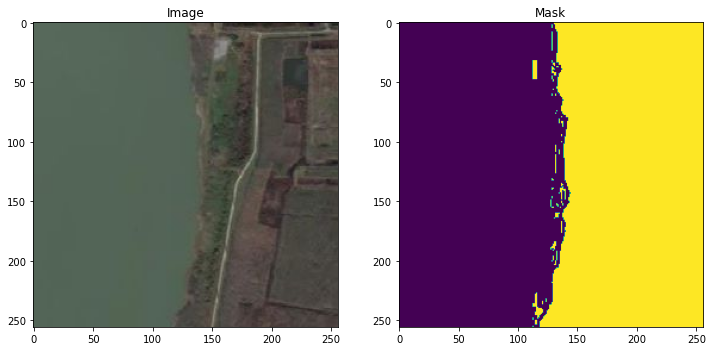

In [10]:



train_img_dir =  "256_patches/images/"
train_mask_dir = "256_patches/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

#img_list.sort()
#msk_list.sort()
#print(msk_list)
#print(img_list)
num_images = len(os.listdir(train_img_dir))
#print(num_images)

img_num = random.randint(0, num_images-1)
#print(msk_list[767])
#print(img_list[767])

img_for_plot = cv2.imread(train_img_dir+img_list[img_num],1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot)
plt.title('Mask')
plt.show()

In [22]:
!pip install split-folders


In [11]:



#print("Total useful images are: ", len(img_list)-useless)  #20,075
#print("Total useless images are: ", useless) #21,571
###############################################################
#Now split the data into training, validation and testing. 

"""
Code for splitting folder into train, test, and val.
Once the new folders are created rename them and arrange in the format below to be used
for semantic segmentation using data generators. 
pip install split-folders
"""
import splitfolders  # or import split_folders

input_folder = '256_patches/'
output_folder = 'data_for_training_and_testing/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
########################################

#Now manually move folders around to bring them to the following structure.
"""
Your current directory structure:
Data/
    train/
        images/
            img1, img2, ...
        masks/
            msk1, msk2, ....
    val/
        images/
            img1, img2, ...
        masks/
            msk1, msk2, ....
        
Copy the folders around to the following structure... 
Data/
    train_images/
                train/
                    img1, img2, img3, ......
    
    train_masks/
                train/
                    msk1, msk, msk3, ......
                    
    val_images/
                val/
                    img1, img2, img3, ......                
    val_masks/
                val/
                    msk1, msk, msk3, ......
      
                    
"""


Copying files: 13032 files [02:48, 77.55 files/s] 


'\nYour current directory structure:\nData/\n    train/\n        images/\n            img1, img2, ...\n        masks/\n            msk1, msk2, ....\n    val/\n        images/\n            img1, img2, ...\n        masks/\n            msk1, msk2, ....\n        \nCopy the folders around to the following structure... \nData/\n    train_images/\n                train/\n                    img1, img2, img3, ......\n    \n    train_masks/\n                train/\n                    msk1, msk, msk3, ......\n                    \n    val_images/\n                val/\n                    img1, img2, img3, ......                \n    val_masks/\n                val/\n                    msk1, msk, msk3, ......\n      \n                    \n'

In [ ]:
import efficientnet.keras as effnet


In [ ]:
import keras; print(keras.__version__)

In [ ]:
for a in range(9):
       print(a)

In [ ]:
import splitfolders 